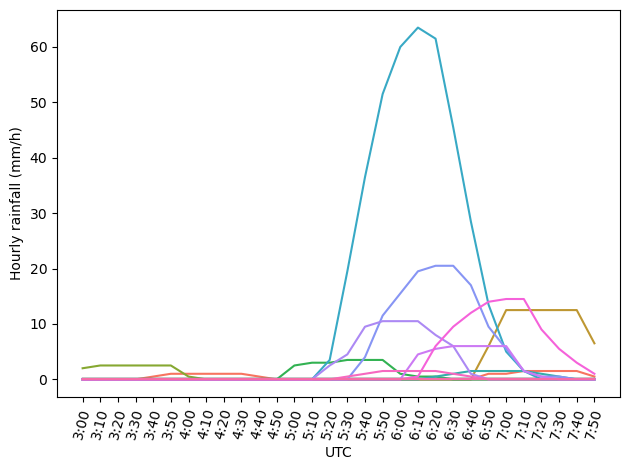

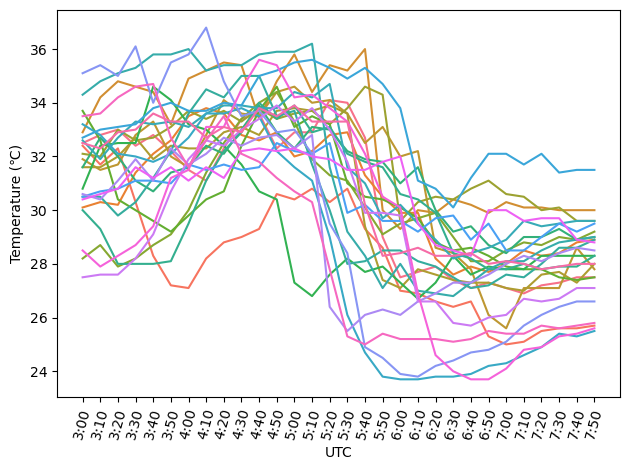

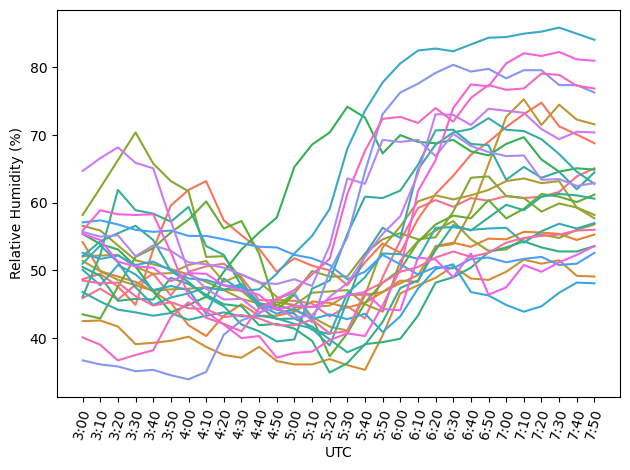

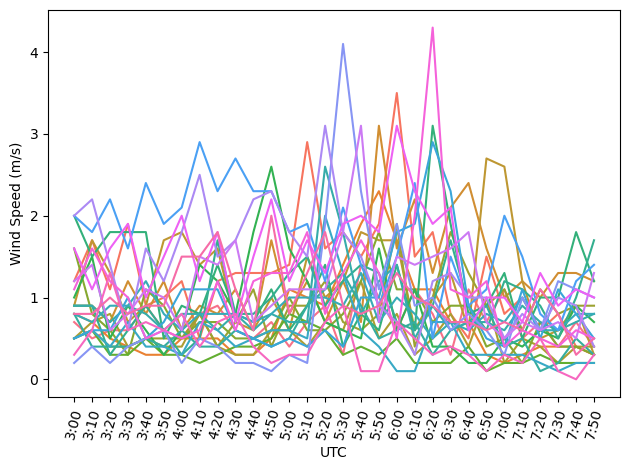

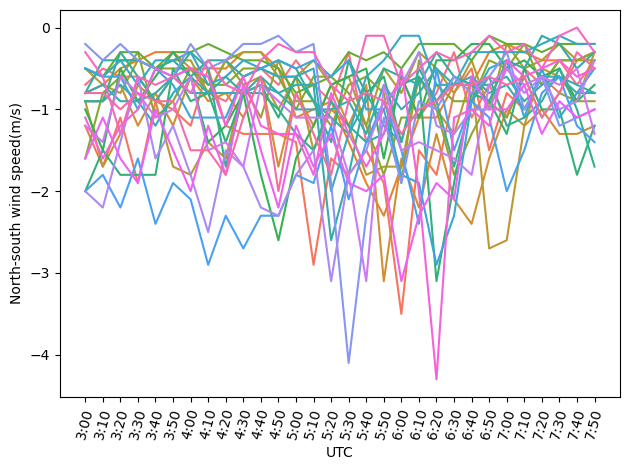

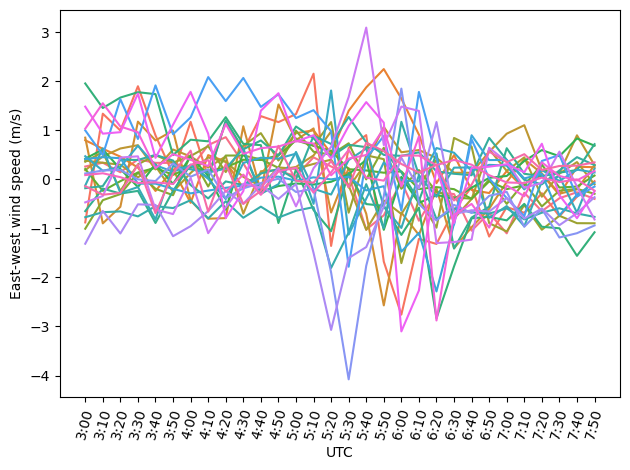

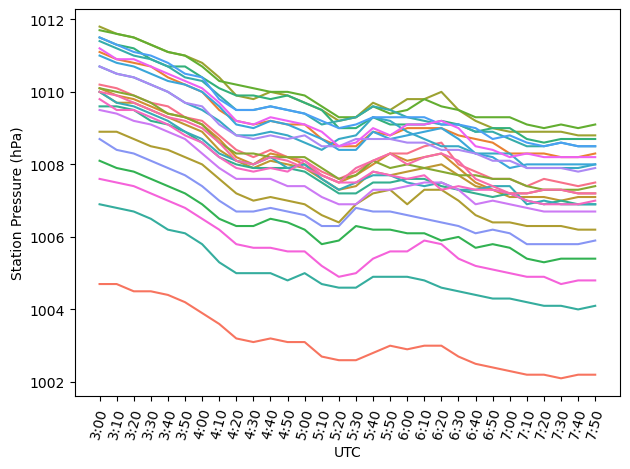

In [5]:
import sys

sys.path.append("../")
from utils import time_series_df, time_series_plot

data_root_dir_path = "../../../data/one_day_data/"
year = "2019"
month = "10"
date = "04"
start_time_h = 3
end_time_h = 7

df = time_series_df(data_root_dir_path, year, month, date, start_time_h, end_time_h)
df.tail()

save_fig_dir = "."
time_series_plot(df, target_cols=["hour-rain", "AT1", "RH1", "WS1", "WD1", "V-Wind", "U-Wind", "PRS"], save_fig_dir=save_fig_dir, exclude_observation_points=["Vlz-Bagbaguin_00174731", "MM-EFCOS_00173456"])